Noam Greenstein : greenstein.n@northeastern.edu 201-956-9092

In [21]:
import pandas as pd
data = pd.read_csv('data.csv')
data.head()

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,OUT_KEY,BALLS,STRIKES,IS_RUNNER_ON_1B,IS_RUNNER_ON_2B,IS_RUNNER_ON_3B,...,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
0,197,1,1,1,0,0,0,0,0,0,...,-12.36030,2402.459961,100.764999,-2.42717,6.08550,6.46,1.612990,-5.76003,0.197045,1.91282
1,348,1,2,1,1,0,0,0,0,0,...,-10.95030,2273.459961,100.431000,-2.52253,5.97044,6.56,0.631016,-4.60990,-0.943079,2.87744
2,1072,1,2,2,1,1,0,0,0,0,...,4.35335,2314.459961,89.848999,-2.64242,5.89410,6.71,3.330480,-6.76551,0.012025,2.16833
3,420,1,3,1,1,0,0,1,0,0,...,4.27254,2340.459961,89.810997,-2.52429,5.90717,6.55,3.804230,-6.87764,0.584736,2.11319
4,198,1,3,2,1,0,1,1,0,0,...,1.62418,2445.459961,89.014397,-2.68096,6.10905,6.37,2.385210,-5.89879,-0.634335,3.45222


Check data types and for null values

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9889 entries, 0 to 9888
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PID                        9889 non-null   int64  
 1   INNING_KEY                 9889 non-null   int64  
 2   BATTER_IN_INNING_KEY       9889 non-null   int64  
 3   PITCH_NUMBER               9889 non-null   int64  
 4   OUT_KEY                    9889 non-null   int64  
 5   BALLS                      9889 non-null   int64  
 6   STRIKES                    9889 non-null   int64  
 7   IS_RUNNER_ON_1B            9889 non-null   int64  
 8   IS_RUNNER_ON_2B            9889 non-null   int64  
 9   IS_RUNNER_ON_3B            9889 non-null   int64  
 10  PITCHER_KEY                9889 non-null   int64  
 11  THROW_SIDE_KEY             9889 non-null   object 
 12  PITCH_TYPE_TRACKED_KEY     9889 non-null   object 
 13  EVENT_RESULT_KEY           2631 non-null   objec

Drop irrelevant columns 

In [23]:
data.drop(data.columns[1:11], axis=1, inplace=True)
data.drop(data.columns[3:5], axis=1, inplace=True)

Fix data types

In [24]:
data[['THROW_SIDE_KEY', 'PITCH_TYPE_TRACKED_KEY']] = data[['THROW_SIDE_KEY', 'PITCH_TYPE_TRACKED_KEY']].astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9889 entries, 0 to 9888
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PID                        9889 non-null   int64  
 1   THROW_SIDE_KEY             9889 non-null   string 
 2   PITCH_TYPE_TRACKED_KEY     9889 non-null   string 
 3   INDUCED_VERTICAL_BREAK     9889 non-null   float64
 4   HORIZONTAL_BREAK           9889 non-null   float64
 5   SPIN_RATE_ABSOLUTE         9889 non-null   float64
 6   RELEASE_SPEED              9889 non-null   float64
 7   RELEASE_SIDE               9889 non-null   float64
 8   RELEASE_HEIGHT             9889 non-null   float64
 9   RELEASE_EXTENSION          9889 non-null   float64
 10  HORIZONTAL_APPROACH_ANGLE  9889 non-null   float64
 11  VERTICAL_APPROACH_ANGLE    9889 non-null   float64
 12  PLATE_X                    9889 non-null   float64
 13  PLATE_Z                    9889 non-null   float

Check for duplicates, incorrect negative values, outliers, and logical consistency 

In [25]:
data.duplicated().value_counts()

False    9889
Name: count, dtype: int64

In [26]:
print(data[data['SPIN_RATE_ABSOLUTE'] < 0].shape)
print(data[data['RELEASE_SPEED'] < 0].shape)
print(data[data['PID'] < 0].shape)

(0, 14)
(0, 14)
(0, 14)


In [27]:
outliers = {}
description = data.describe()
for column in data.columns[3:]:
    q1 = description[column]['25%']
    q3 = description[column]['75%']
    iqr = q3 - q1
    upper_outlier_df = data[data[column] > q3 + 1.5 * iqr]
    lower_outlier_df = data[data[column] < q1 - 1.5 * iqr ]
    outliers[column] = upper_outlier_df.shape[0] + lower_outlier_df.shape[0]
outliers

{'INDUCED_VERTICAL_BREAK': 74,
 'HORIZONTAL_BREAK': 0,
 'SPIN_RATE_ABSOLUTE': 578,
 'RELEASE_SPEED': 57,
 'RELEASE_SIDE': 0,
 'RELEASE_HEIGHT': 629,
 'RELEASE_EXTENSION': 45,
 'HORIZONTAL_APPROACH_ANGLE': 259,
 'VERTICAL_APPROACH_ANGLE': 41,
 'PLATE_X': 82,
 'PLATE_Z': 85}

In [28]:
print(data['THROW_SIDE_KEY'].value_counts(dropna=False))
print(data['PITCH_TYPE_TRACKED_KEY'].value_counts(dropna=False))

THROW_SIDE_KEY
R    7268
L    2621
Name: count, dtype: Int64
PITCH_TYPE_TRACKED_KEY
FB    3295
SW    1716
CF    1307
CH    1198
SL     909
SI     815
CB     469
SF     173
UN       4
KN       3
Name: count, dtype: Int64


Check distributions for skews and inconsistenies

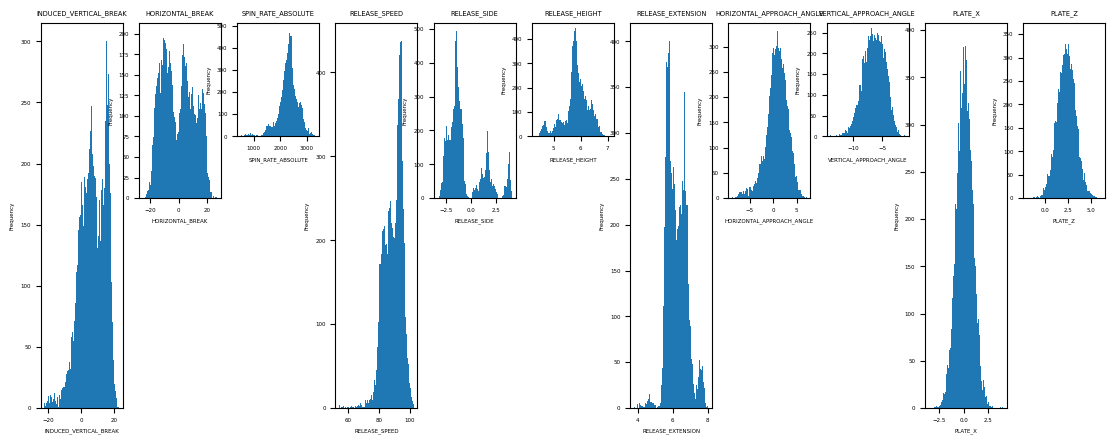

In [29]:
import matplotlib.pyplot as plt
import matplotlib.rcsetup
plt.figure(figsize=(15,5))

for idx, column in enumerate(data.columns[3:]):
    plt.subplot((idx % 3) + 1, 12, idx + 1)
    plt.hist(data[column], bins=100)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

matplotlib.rcParams.update({'font.size': 4})
plt.show()

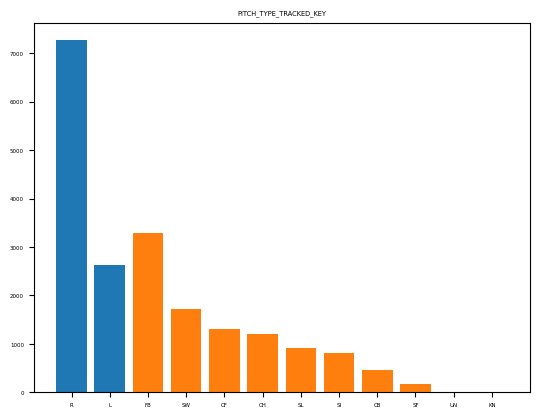

In [30]:
plt.title('THROW_SIDE_KEY')
tsk = data['THROW_SIDE_KEY'].value_counts()
plt.bar(tsk.index, tsk.values)
plt.title('PITCH_TYPE_TRACKED_KEY')
ptk = data['PITCH_TYPE_TRACKED_KEY'].value_counts()
plt.bar(ptk.index, ptk.values)
plt.show()

Check for correlation between values to exclude non correlated features

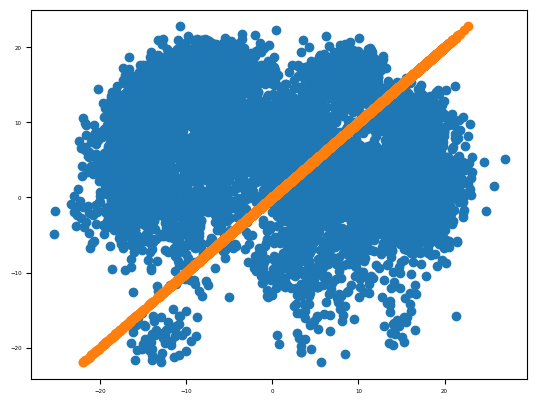

INDUCED_VERTICAL_BREAK: -0.22960255363110182,1.0
INDUCED_VERTICAL_BREAK: 1.8599128974644814e-118,0.0


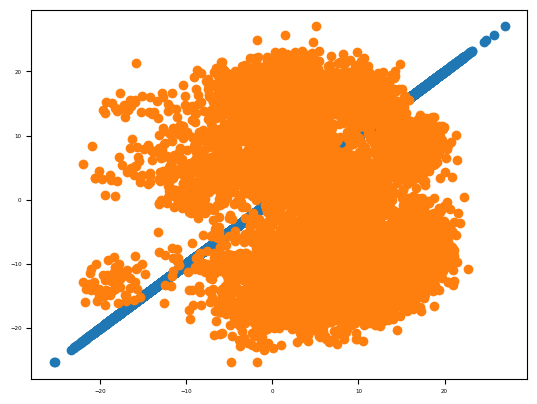

HORIZONTAL_BREAK: 0.9999999999999987,-0.22960255363110182
HORIZONTAL_BREAK: 0.0,1.8599128974644814e-118


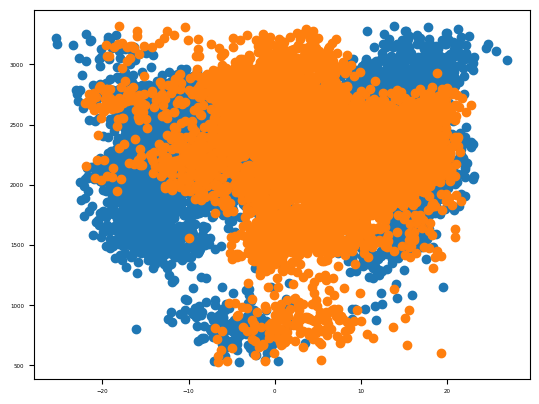

SPIN_RATE_ABSOLUTE: 0.2016952588260963,-0.15557702050799696
SPIN_RATE_ABSOLUTE: 2.710443389578778e-91,1.2782628912650838e-54


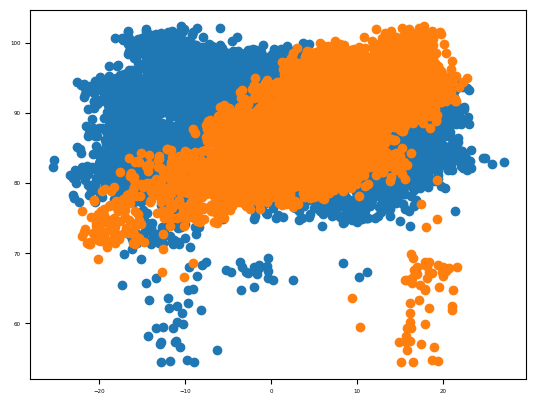

RELEASE_SPEED: -0.12754442489788662,0.6465346730542015
RELEASE_SPEED: 3.832570153864065e-37,0.0


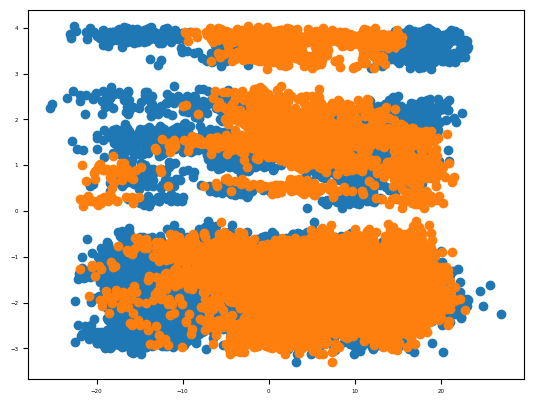

RELEASE_SIDE: 0.27671007402789677,-0.06438151138606832
RELEASE_SIDE: 2.7541379462418537e-173,1.4728736868421844e-10


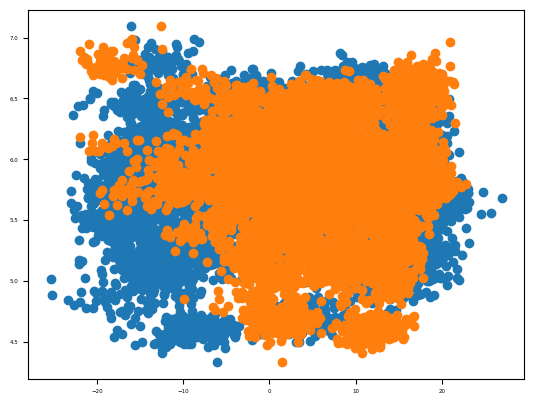

RELEASE_HEIGHT: 0.06913432428887228,-0.005647753317518577
RELEASE_HEIGHT: 5.888475725567745e-12,0.5744120482113645


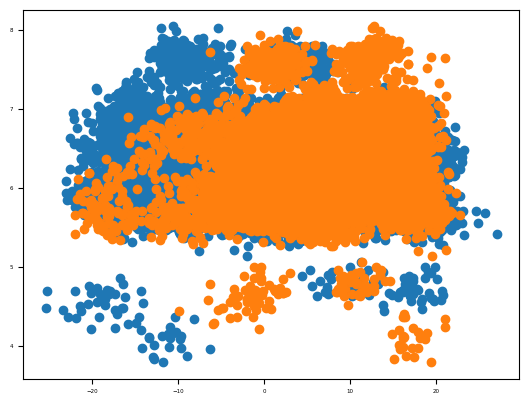

RELEASE_EXTENSION: -0.08130704736880176,0.12605339155243506
RELEASE_EXTENSION: 5.594325667360707e-16,2.591824747923451e-36


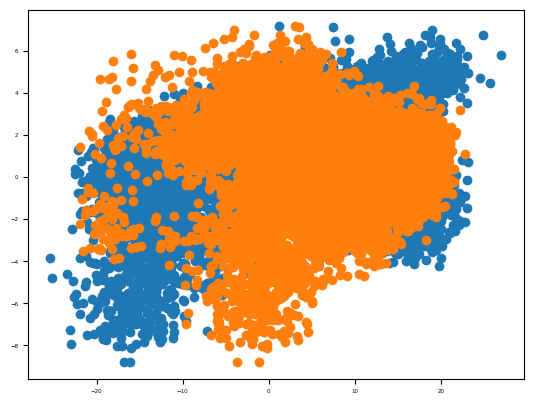

HORIZONTAL_APPROACH_ANGLE: 0.35511517870281156,-0.06960217384046452
HORIZONTAL_APPROACH_ANGLE: 8.977401136360148e-292,4.237981695236115e-12


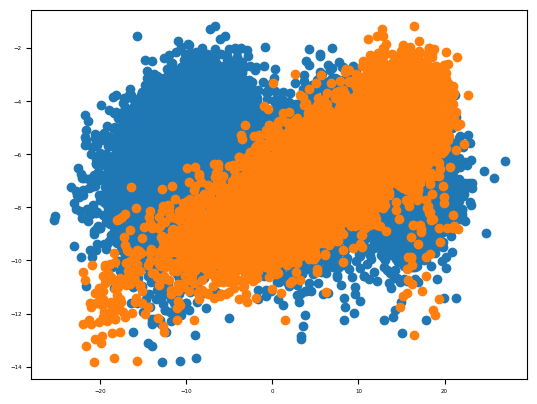

VERTICAL_APPROACH_ANGLE: -0.16906417913182906,0.781251887010436
VERTICAL_APPROACH_ANGLE: 2.603819481649815e-64,0.0


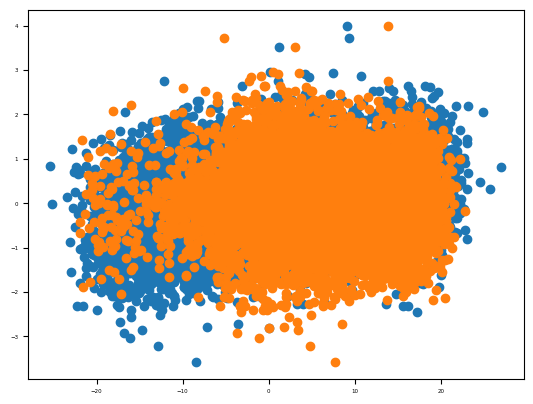

PLATE_X: 0.3083073462169129,-0.04159260216940471
PLATE_X: 9.561269802624761e-217,3.512950776441584e-05


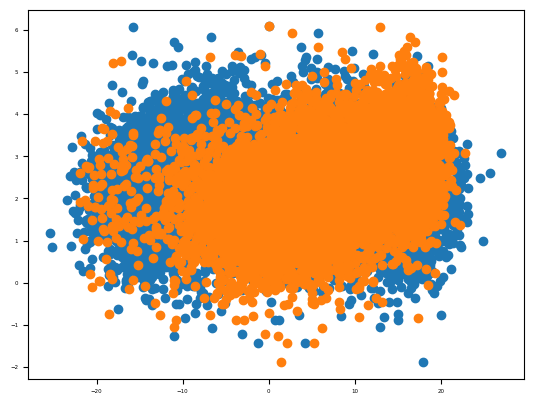

PLATE_Z: -0.06529970193293977,0.39210731077527317
PLATE_Z: 8.045660853679506e-11,0.0


In [31]:
import scipy
from scipy.stats import pearsonr
break_h = data['HORIZONTAL_BREAK']
break_v = data['INDUCED_VERTICAL_BREAK']
values = []
for column in data.columns[3:]:
    values.append((column, data[column]))

vars_dp = []

for value in values:
    correlation_h, p_val_h = pearsonr(break_h, value[1])
    correlation_v, p_val_v = pearsonr(break_v, value[1])
    plt.scatter(break_h, value[1])
    plt.scatter(break_v, value[1])
    plt.show()
    print(f'{value[0]}: {correlation_h},{correlation_v}')
    print(f'{value[0]}: {p_val_h},{p_val_v}')
    if correlation_h > 0.5 or correlation_h < -0.5 or correlation_v > 0.5 or correlation_v < -0.5:
        vars_dp.append(value[0])


In [32]:
print(vars_dp)


['INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK', 'RELEASE_SPEED', 'VERTICAL_APPROACH_ANGLE']


Cluster pitches to try and locate pitches affected by dewpoint

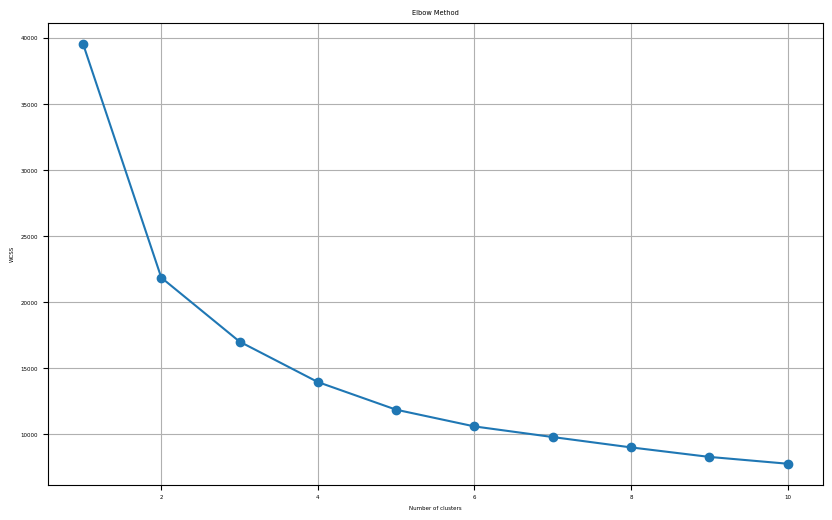

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_counts = []
scaled_df = scaler.fit_transform(data[vars_dp])
wcss = []  

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, '-o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Optimal Clusters = 4


In [34]:
kmeans = KMeans(n_clusters=4,n_init=10).fit(scaled_df)
centroids = kmeans.cluster_centers_
cluster_labels = pd.DataFrame({'data': kmeans.labels_})

print("Centroids : \n", centroids)
print("Labels : ", cluster_labels.value_counts())

Centroids : 
 [[ 0.36839761  0.65348377  0.50046841  0.35930714]
 [-0.98515705  0.99211376 -0.75621101 -0.84169439]
 [-0.59504094 -1.05676223 -1.08718763 -0.84713958]
 [ 0.88181841 -0.80360678  0.85721378  0.91256375]]
Labels :  data
3       2991
1       2586
0       2571
2       1741
Name: count, dtype: int64


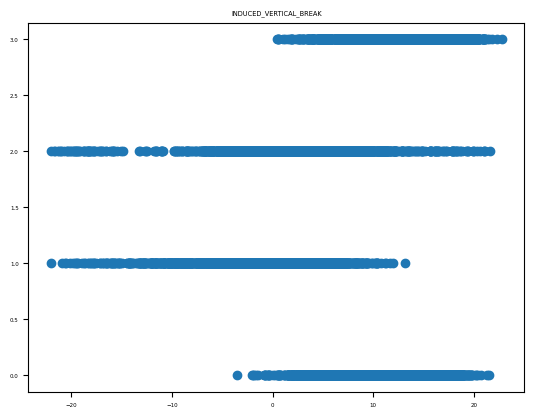

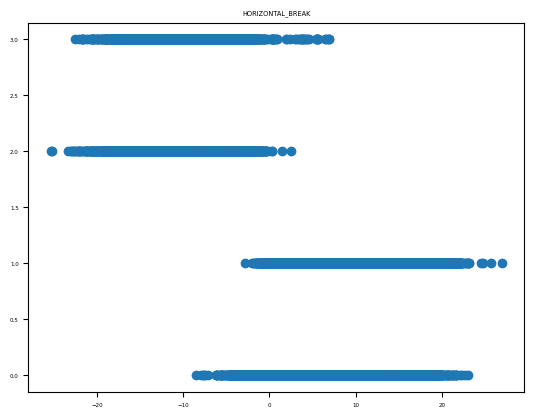

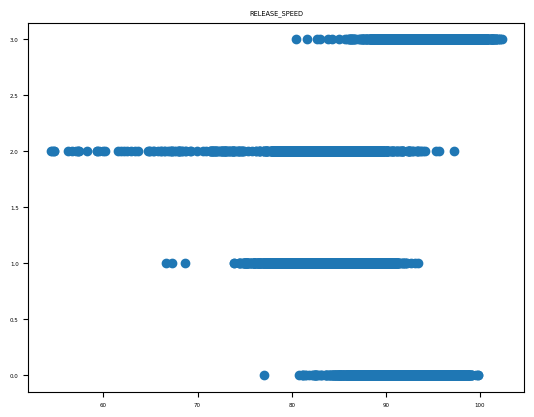

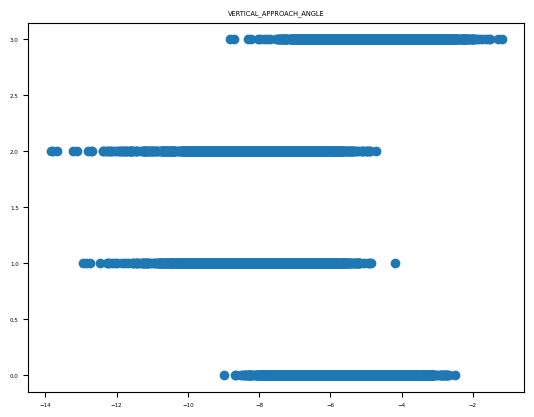

In [35]:
data['DEWPOINT_AFFECTED'] = cluster_labels
for var in vars_dp:
    plt.title(var)
    plt.scatter(data[var], data['DEWPOINT_AFFECTED'])
    plt.show()

Clustering results don't provide insights required

Will assume most extreme values are affected by dew point

In [36]:
from sklearn.model_selection import train_test_split
data['DEWPOINT_AFFECTED'] = data['DEWPOINT_AFFECTED'] = ((data['INDUCED_VERTICAL_BREAK'].abs() > data['INDUCED_VERTICAL_BREAK'].abs().quantile(0.95)) | 
                            (data['HORIZONTAL_BREAK'] > data['HORIZONTAL_BREAK'].quantile(0.95)) |
                            (data['RELEASE_SPEED'].abs() > data['RELEASE_SPEED'].abs().quantile(0.95)) |
                            (data['VERTICAL_APPROACH_ANGLE'].abs() > data['VERTICAL_APPROACH_ANGLE'].abs().quantile(0.95))
                            ).astype(int)
x = data[vars_dp]
y = data['DEWPOINT_AFFECTED']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Initialize model
model = xgb.XGBClassifier(eval_metric='logloss')

# cross validate
auc_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='roc_auc')

# Predict on the test set
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
classification_rep = classification_report(y_test, y_pred)


print(auc_scores)
print(classification_rep)



[1.         0.99999226 1.         1.         0.99982755]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1623
           1       1.00      1.00      1.00       355

    accuracy                           1.00      1978
   macro avg       1.00      1.00      1.00      1978
weighted avg       1.00      1.00      1.00      1978



Tune hyperparameters to investigate accuracy score

In [38]:
from sklearn.model_selection import GridSearchCV
grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [2, 3, 4, 5],
    'n_estimators': [50, 100, 150, 200],
}
grid_search = GridSearchCV(xgb.XGBClassifier(), grid, cv=5, scoring='roc_auc')
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
y_pred_prob = grid_search.predict_proba(x_test)[:, 1]
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1623
           1       1.00      1.00      1.00       355

    accuracy                           1.00      1978
   macro avg       1.00      1.00      1.00      1978
weighted avg       1.00      1.00      1.00      1978



Save Data and make predictions.

In [39]:
import numpy
submission = pd.read_csv('sample_submission.csv')
pids = []
pid = submission['PID']
for pitch in pid:
    pids.append(data[data['PID'] == pitch])

dpa = [id_data[vars_dp] for id_data in pids]
n_dpa = numpy.array(dpa)
reshaped_dpa = n_dpa.reshape(9889, 4)
submission['DEWPOINT_AFFECTED'] = model.predict_proba(reshaped_dpa)
submission.to_csv('sample_submission.csv', index=False)

